# 5. Bar charts

Bar charts are very common, but that is no reason to avoid them. If anything, readers immediately know how to interpret the graph.

In this notebook, we will go through a simple example involving the 100% bar chart visualization. Although this visualization can be created easily with matplotlib, Multiplex includes helper functions so you can create these visualizations faster.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

The first example uses data from [the International Energy Agency](https://www.iea.org/data-and-statistics?fuel=Energy%20supply&indicator=Electricity%20generation%20by%20source) to show how different countries generate electricity. Although a normal bar chart would do, a 100% bar chart makes it clearer how the energy trends are different from one region to another.

The included dataset contains information about energy sources from China, the European Union and the United States. We compare only five sources: coal, oil, natural gas, nuclear and renewable energy sources.

In [2]:
# load the data
df = pd.read_csv('data/energy.csv')
df.set_index('Region', inplace=True)
df

,Coal,Oil,Natural Gas,Nuclear,Renewable
Region,,,,,
China,4508568,10278,196400,248070,1708612
European Union,709362,60660,663311,829719,1035872
United States,1254542,38825,1513414,841329,786799


Having loaded the data, we can draw the 100% bar chart by calling the `draw_bar_100` function on the Drawable. Always provide the list of values as the first argument. Other arguments and keyword arguments can be used to style the bars.

> Note that the 100% bar chart visualization moves the x-axis ticks and label to the top of the plot. It also removes the grid. These changes can be disabled by passing on `style_plot=False` to the `draw_bar_100` function.

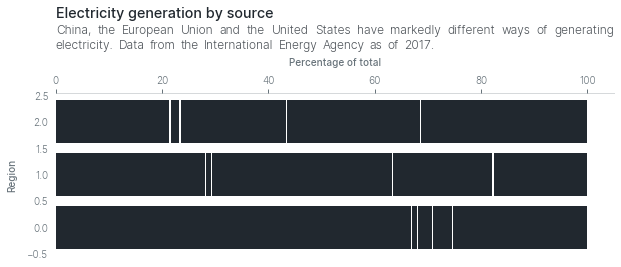

In [3]:
# import the Drawable class and set the style
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

# create a general style
style = { 'color': 'C0' }

# draw the visualization
figure = plt.figure(figsize=(10, 3))
viz = drawable.Drawable(figure)
viz.draw_bar_100(df.loc['China'].tolist(), **style)
viz.draw_bar_100(df.loc['United States'].tolist(), **style)
viz.draw_bar_100(df.loc['European Union'].tolist(), **style)

# customize the plot
viz.set_xlabel('Percentage of total')
viz.set_ylabel('Region')
viz.set_title('Electricity generation by source', loc='left')
viz.set_caption("""China, the European Union and the United States have markedly different ways of generating electricity.
                   Data from the International Energy Agency as of 2017.""", align='justify')
plt.show()

That's not very expressive, though, is it? Like other Multiplex visualizations, you can customize the plot by specifying styles for each value. As usual, the general style is used unless the specific style overrides it.

Overriding the style is very simple. Instead of providing numbers, provide a dictionary for the bar you want to customize. The dictionary must have, at least, a `value` key. The styling options go into the `style` key.

In the next example, we highlight what proportion of energy comes from natural gas.

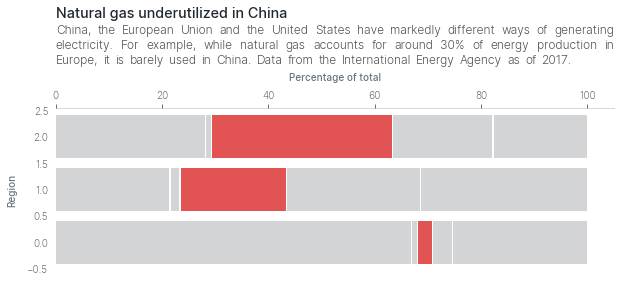

In [4]:
# import the Drawable class and set the style
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

# create a general style
style = { 'color': 'C0', 'alpha': 0.2 }

# create a specific style
highlight = { 'color': 'C1', 'alpha': 0.75 }

# draw the visualization
figure = plt.figure(figsize=(10, 3))
viz = drawable.Drawable(figure)
for region in df.index:
    values = df.loc[region].tolist()
    values[2] = { 'value': values[2], 'style': highlight }
    viz.draw_bar_100(values, **style)

# customize the plot
viz.set_xlabel('Percentage of total')
viz.set_ylabel('Region')
viz.set_title('Natural gas underutilized in China', loc='left')
viz.set_caption("""China, the European Union and the United States have markedly different ways of generating electricity.
                   For example, while natural gas accounts for around 30% of energy production in Europe, it is barely used in China.
                   Data from the International Energy Agency as of 2017.""", align='justify')
plt.show()